In [ ]:
### requires scikit-learn>=1.3 for HDBSCAN

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis, norm
from sklearn.cluster import DBSCAN, HDBSCAN
%matplotlib inline

In [2]:
skews = np.load('/datax/scratch/benjb/skewnesses.npz')['arr_0']
kurts = np.load('/datax/scratch/benjb/kurtoses.npz')['arr_0']
sarles = np.load('/datax/scratch/benjb/sarles.npz')['arr_0']
corrs = np.load('/datax/scratch/benjb/new_new_corrs.npz')['arr_0']
tbws = np.load('/datax/scratch/benjb/new_new_tbws.npz')['arr_0']
tskews = np.load('/datax/scratch/benjb/temporal_skewnesses.npz')['arr_0']
tstds = np.load('/datax/scratch/benjb/tstds.npz')['arr_0']
fstds = np.load('/datax/scratch/benjb/fstds.npz')['arr_0']
sigbws = np.load('/datax/scratch/benjb/MESSIER031_00_signal_bws.npz')['arr_0']

In [4]:
prefix = 'setigen'
skews = np.concatenate((skews, np.load(f'/datax/scratch/benjb/{prefix}_skewnesses.npz')['arr_0']))
kurts = np.concatenate((kurts, np.load(f'/datax/scratch/benjb/{prefix}_kurtoses.npz')['arr_0']))
sarles = np.concatenate((sarles, np.load(f'/datax/scratch/benjb/{prefix}_sarles.npz')['arr_0']))
corrs = np.concatenate((corrs, np.load(f'/datax/scratch/benjb/{prefix}_corrs.npz')['arr_0']))
tbws = np.concatenate((tbws, np.load(f'/datax/scratch/benjb/{prefix}_tbws.npz')['arr_0']))
tskews = np.concatenate((tskews, np.load(f'/datax/scratch/benjb/{prefix}_tskews.npz')['arr_0']))
tstds = np.concatenate((tstds, np.load(f'/datax/scratch/benjb/{prefix}_tstds.npz')['arr_0']))
fstds = np.concatenate((fstds, np.load(f'/datax/scratch/benjb/{prefix}_fstds.npz')['arr_0']))
sigbws = np.concatenate((sigbws, np.load(f'/datax/scratch/benjb/{prefix}_signal_bws.npz')['arr_0']))

In [6]:
prefix = 'HIP3223'
skews = np.concatenate((skews, np.load(f'/datax/scratch/benjb/{prefix}_skewnesses.npz')['arr_0']))
kurts = np.concatenate((kurts, np.load(f'/datax/scratch/benjb/{prefix}_kurtoses.npz')['arr_0']))
sarles = np.concatenate((sarles, np.load(f'/datax/scratch/benjb/{prefix}_sarles.npz')['arr_0']))
corrs = np.concatenate((corrs, np.load(f'/datax/scratch/benjb/{prefix}_corrs.npz')['arr_0']))
tbws = np.concatenate((tbws, np.load(f'/datax/scratch/benjb/{prefix}_tbws.npz')['arr_0']))
tskews = np.concatenate((tskews, np.load(f'/datax/scratch/benjb/{prefix}_tskews.npz')['arr_0']))
tstds = np.concatenate((tstds, np.load(f'/datax/scratch/benjb/{prefix}_tstds.npz')['arr_0']))
fstds = np.concatenate((fstds, np.load(f'/datax/scratch/benjb/{prefix}_fstds.npz')['arr_0']))
sigbws = np.concatenate((sigbws, np.load(f'/datax/scratch/benjb/{prefix}_signal_bws.npz')['arr_0']))

In [17]:
lfiles = ['/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16530_HIP2792_0058.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17168_HIP3077_0060.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5',
'/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17801_HIP3223_0062.gpuspec.0000.h5']

filename = '/datax/scratch/benjb/m31_l_data/' + lfiles[0][44:-2] + 'dat'

df0 = pd.read_table(filename, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                            'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                            'Full_number_of_hits'], skiprows=9)

freqs = df0['Uncorrected_Frequency'].values
drifts = df0['Drift_Rate'].values
snrs = df0['SNR'].values

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_506470/3868843571.py:10: SyntaxWarning: invalid escape sequence '\s'
  df0 = pd.read_table(filename, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',


In [18]:
df1 = pd.read_table('/datax/scratch/benjb/m31_observation_with_setigen.dat', sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                            'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                            'Full_number_of_hits'], skiprows=9)

top_hit_no = df1['Top_Hit_#'].values

stg_idxs = np.where((top_hit_no == 111) | (top_hit_no == 1743) | (top_hit_no == 362))[0]

freqs = np.concatenate((freqs, df1['Uncorrected_Frequency'].values[stg_idxs]))
drifts = np.concatenate((drifts, df1['Drift_Rate'].values[stg_idxs]))
snrs = np.concatenate((snrs, df1['SNR'].values[stg_idxs]))

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_506470/3130409983.py:1: SyntaxWarning: invalid escape sequence '\s'
  df1 = pd.read_table('/datax/scratch/benjb/m31_observation_with_setigen.dat', sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',


In [19]:
df2 = pd.read_table('/datax/scratch/benjb/m31_l_data/' + lfiles[5][44:-2] + 'dat', sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                            'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                            'Full_number_of_hits'], skiprows=9)

df2_idxs = np.where((df2['Uncorrected_Frequency'].values > 1590) & (df2['Uncorrected_Frequency'].values < 1610))[0]

freqs = np.concatenate((freqs, df2['Uncorrected_Frequency'].values[df2_idxs]))
drifts = np.concatenate((drifts, df2['Drift_Rate'].values[df2_idxs]))
snrs = np.concatenate((snrs, df2['SNR'].values[df2_idxs]))

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_506470/2583672721.py:1: SyntaxWarning: invalid escape sequence '\s'
  df2 = pd.read_table('/datax/scratch/benjb/m31_l_data/' + lfiles[5][44:-2] + 'dat', sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',


In [20]:
print(len(freqs))

3387


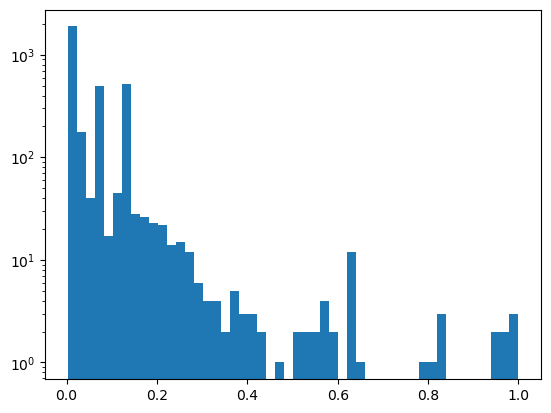

In [25]:
plt.hist(sigbws/np.max(sigbws), bins=50)
plt.yscale('log')
plt.show()

In [27]:
data_arr = np.array([(freqs-np.min(freqs))/np.max(freqs-np.min(freqs)), 
                     np.abs(drifts)/np.max(drifts), 
                     (np.log10(snrs)-np.min(np.log10(snrs)))/np.max(np.log10(snrs)-np.min(np.log10(snrs))), 
                     (skews-np.min(skews))/np.max((skews-np.min(skews))), 
                     (np.log10(kurts)-np.min(np.log10(kurts)))/np.max(np.log10(kurts)-np.min(np.log10(kurts))), 
                     sarles, 
                     corrs, 
                     (np.log10(tbws*1e6)-np.min(np.log10(tbws*1e6)))/np.max(np.log10(tbws*1e6)-np.min(np.log10(tbws*1e6))),
                     (tskews-np.min(tskews))/np.max((tskews-np.min(tskews))),
                     (np.log10(tstds)-np.min(np.log10(tstds))),
                     (np.log10(fstds)-np.min(np.log10(fstds))),
                     sigbws/np.max(sigbws)
                     ])  ### PRE-PROCESSED FOR HDBSCAN

data_arr_unscaled = np.array([freqs, 
                     drifts, 
                     snrs, 
                     skews, 
                     kurts, 
                     sarles, 
                     corrs, 
                     tbws*1e6,
                     tskews,
                     tstds,
                     fstds,
                     sigbws
                     ])

df = pd.DataFrame(np.transpose(data_arr),
                   columns=['frequency [MHz]', 
                            'drift rate [Hz/s]', 
                            'log10 SNR', 
                            'skewness', 
                            'log10 kurtosis', 
                            'Sarle\'s coefficient', 
                            'correlation coefficient [kurtosis vs. log(bandwidth)]', 
                            'log10 turning-point bandwidth [Hz]', 
                            'temporal skewness', 
                            'log10 time-series standard deviation', 
                            'log10 power-spectrum standard deviation',
                            'signal bandwidth'])

dfu = pd.DataFrame(np.transpose(data_arr_unscaled),
                   columns=['frequency [MHz]', 
                            'drift rate [Hz/s]', 
                            'SNR', 
                            'spectral skewness', 
                            'spectral kurtosis', 
                            'Sarle\'s coefficient', 
                            'correlation coefficient [kurtosis vs. log(bandwidth)]', 
                            'turning-point bandwidth [Hz]', 
                            'temporal skewness', 
                            'time-series standard deviation', 
                            'power-spectrum standard deviation',
                            'signal bandwidth'])

In [28]:
dfu

,frequency [MHz],drift rate [Hz/s],SNR,spectral skewness,spectral kurtosis,Sarle's coefficient,correlation coefficient [kurtosis vs. log(bandwidth)],turning-point bandwidth [Hz],temporal skewness,time-series standard deviation,power-spectrum standard deviation,signal bandwidth
0,1681.553703,0.040817,13.128177,8.573884,129.905700,0.573581,0.988025,63385.040351,0.691419,0.408708,0.057113,16.763806
1,1681.539912,0.030613,12.317575,6.674641,87.374658,0.521328,0.982859,100000.000000,0.534756,0.442179,0.061947,25.145710
2,1681.530918,0.040817,14.651185,6.566308,71.974816,0.612942,0.973850,100000.000000,0.109218,0.691577,0.073220,22.351742
3,1681.526118,0.030613,26.196520,12.691490,202.851562,0.798978,0.973628,100000.000000,0.125301,0.738614,0.054852,25.145710
4,1681.517125,0.040817,11.705699,6.025260,86.598273,0.430768,0.993980,79024.422765,0.665303,0.412869,0.060132,36.321580
...,...,...,...,...,...,...,...,...,...,...,...,...
3382,1598.840530,-0.530621,14.822185,1.505020,3.954186,0.825729,0.786210,100000.000000,-0.452590,1.070749,0.266876,164.844096
3383,1598.836431,-0.530621,14.715937,1.518704,4.041234,0.818181,0.745955,100000.000000,-0.399704,0.977033,0.257159,159.256160
3384,1598.824531,-0.551030,13.349620,1.513301,4.091433,0.804139,0.793182,100000.000000,-0.397570,0.964131,0.261402,159.256160
3385,1598.815529,-0.530621,10.749515,1.497510,4.089189,0.792953,0.794557,100000.000000,-0.434767,1.003769,0.259019,153.668225


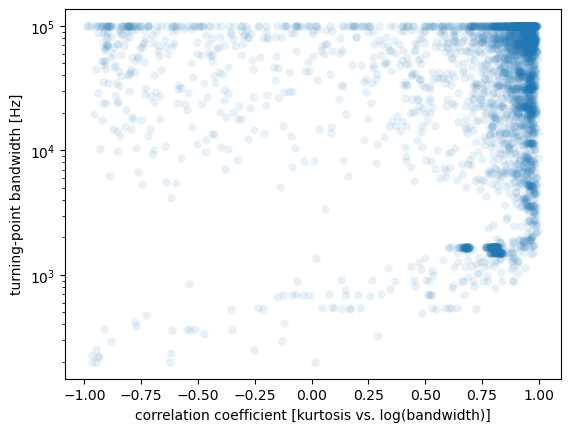

In [97]:
p1 = dfu.columns[6]
p2 = dfu.columns[7]
plt.scatter(dfu[p1].values, dfu[p2].values, alpha=0.1, linewidths=0)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel(p1)
plt.ylabel(p2)
plt.show()

Fitting ...
Making labels ...
Scattering ...
Refining ...


/tmp/ipykernel_2131849/764598378.py:47: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


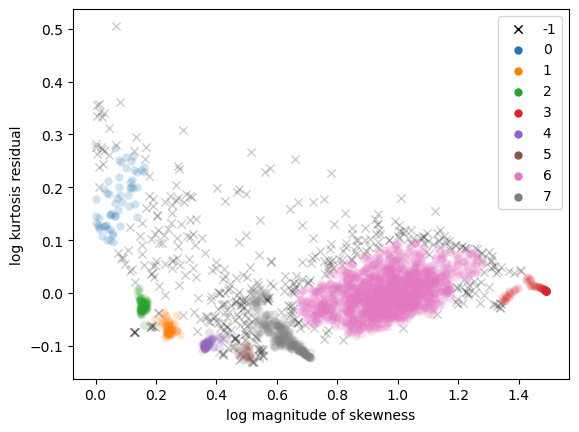

In [70]:
hdb = HDBSCAN(min_cluster_size=20, min_samples=20)

cut = 1

coef = np.polyfit(np.log10(np.abs(skews)[np.where(np.abs(skews) > cut)[0]]), np.log10(kurts[np.where(np.abs(skews) > cut)[0]]), 1)
poly1d_fn = np.poly1d(coef)

xunsorted = np.abs(skews)[np.where(np.abs(skews) > cut)[0]]
xmodunsorted = np.log10(xunsorted)
ymodunsorted = poly1d_fn(xmodunsorted)
yunsorted = 10**ymodunsorted

x = np.log10(np.abs(skews)[np.where(np.abs(skews) > cut)[0]])
y = np.log10(kurts[np.where(np.abs(skews) > cut)[0]]) - ymodunsorted

print('Fitting ...')

X = np.transpose(np.array([x, y]))
hdb.fit(X)

#labels = hdb.labels_
print('Making labels ...')
labels_list = hdb.labels_
labels = np.unique(labels_list)
#print(labels)

print('Scattering ...')
for l in labels:
    idxs = np.where(labels_list == l)
    #print(idxs)
    if l == -1.:
        plt.scatter(x[idxs], y[idxs], color='k', marker='x', alpha=0.2, linewidths=1, label=l)
    else:
        plt.scatter(x[idxs], y[idxs], alpha=0.2, linewidths=0, label=l)

print('Refining ...')

#plt.xscale('log')
#plt.yscale('log')
#plt.xlabel('skewness')
#plt.ylabel('kurtosis')

plt.xlabel('log magnitude of skewness')
plt.ylabel('log kurtosis residual')

leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.show()

Fitting ...
Making labels ...
Scattering ...
Refining ...


/tmp/ipykernel_2131849/3448131167.py:52: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


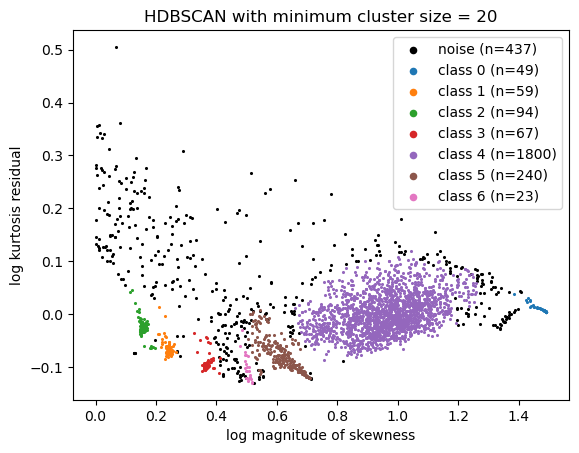

In [102]:
nmincluster = 20
hdb = HDBSCAN(min_cluster_size=nmincluster, min_samples=nmincluster)

cut = 1

coef = np.polyfit(np.log10(np.abs(skews)[np.where(np.abs(skews) > cut)[0]]), np.log10(kurts[np.where(np.abs(skews) > cut)[0]]), 1)
poly1d_fn = np.poly1d(coef)

xunsorted = np.abs(skews)[np.where(np.abs(skews) > cut)[0]]
xmodunsorted = np.log10(xunsorted)
ymodunsorted = poly1d_fn(xmodunsorted)
yunsorted = 10**ymodunsorted

x = np.log10(np.abs(skews)[np.where(np.abs(skews) > cut)[0]])
y = np.log10(kurts[np.where(np.abs(skews) > cut)[0]]) - ymodunsorted

#x = np.abs(skews)[np.where(np.abs(skews) > cut)[0]]
#y = kurts[np.where(np.abs(skews) > cut)[0]]

print('Fitting ...')

X = np.transpose(np.array([x, y+ymodunsorted]))
hdb.fit(X)

#labels = hdb.labels_
print('Making labels ...')
labels_list = hdb.labels_
labels = np.unique(labels_list)
#print(labels)

print('Scattering ...')
for l in labels:
    idxs = np.where(labels_list == l)[0]
    #print(idxs)
    if l == -1.:
        plt.scatter(x[idxs], y[idxs], color='k', s=5, linewidths=0, label=f'noise (n={len(idxs)})')
    else:
        plt.scatter(x[idxs], y[idxs], s=5, linewidths=0, label=f'class {l} (n={len(idxs)})')

print('Refining ...')

#plt.xscale('log')
#plt.yscale('log')
#plt.xlabel('skewness')
#plt.ylabel('kurtosis')

plt.xlabel('log magnitude of skewness')
plt.ylabel('log kurtosis residual')
plt.title(f'HDBSCAN with minimum cluster size = {nmincluster}')

leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([30])

plt.show()

In [29]:
for ii, name in enumerate(dfu.columns):
    print(f'{ii}: {name}')

0: frequency [MHz]
1: drift rate [Hz/s]
2: SNR
3: spectral skewness
4: spectral kurtosis
5: Sarle's coefficient
6: correlation coefficient [kurtosis vs. log(bandwidth)]
7: turning-point bandwidth [Hz]
8: temporal skewness
9: time-series standard deviation
10: power-spectrum standard deviation
11: signal bandwidth


In [61]:
hyperparam_space = []

for nmincluster in np.arange(start=2, stop=13, step=1):
    for nminsamples in np.arange(start=1, stop=5, step=1):
        for eps in np.arange(start=0, stop=0.2, step=0.01):

            #print(f'nmincluster = {nmincluster}, nminsamples = {nminsamples}, eps = {eps}')

            hdb = HDBSCAN(min_cluster_size=nmincluster, min_samples=nminsamples, cluster_selection_epsilon=eps, cluster_selection_method='leaf')

            X = np.transpose(data_arr)
            #hdb.fit(X[:,1:])
            hdb.fit(X)
            
            labels_list = hdb.labels_

            n_anomalies = len(np.where(labels_list==-1)[0])

            #print(n_anomalies)

            if labels_list[3068] == labels_list[3069] == labels_list[3070]:
                recovery = True
            else:
                recovery = False

            hyperparams = np.array([n_anomalies, nmincluster, nminsamples, eps, recovery])
            print(hyperparams)
            hyperparam_space.append(hyperparams)


[982.   2.   1.   0.   0.]
[9.82e+02 2.00e+00 1.00e+00 1.00e-02 0.00e+00]
[9.52e+02 2.00e+00 1.00e+00 2.00e-02 0.00e+00]
[9.03e+02 2.00e+00 1.00e+00 3.00e-02 0.00e+00]
[8.56e+02 2.00e+00 1.00e+00 4.00e-02 0.00e+00]
[8.51e+02 2.00e+00 1.00e+00 5.00e-02 0.00e+00]
[8.42e+02 2.00e+00 1.00e+00 6.00e-02 0.00e+00]
[8.28e+02 2.00e+00 1.00e+00 7.00e-02 0.00e+00]
[7.87e+02 2.00e+00 1.00e+00 8.00e-02 0.00e+00]
[7.25e+02 2.00e+00 1.00e+00 9.00e-02 0.00e+00]
[6.52e+02 2.00e+00 1.00e+00 1.00e-01 0.00e+00]
[5.72e+02 2.00e+00 1.00e+00 1.10e-01 0.00e+00]
[4.94e+02 2.00e+00 1.00e+00 1.20e-01 0.00e+00]
[4.14e+02 2.00e+00 1.00e+00 1.30e-01 0.00e+00]
[3.57e+02 2.00e+00 1.00e+00 1.40e-01 0.00e+00]
[3.0e+02 2.0e+00 1.0e+00 1.5e-01 0.0e+00]
[2.65e+02 2.00e+00 1.00e+00 1.60e-01 0.00e+00]
[2.26e+02 2.00e+00 1.00e+00 1.70e-01 0.00e+00]
[2.0e+02 2.0e+00 1.0e+00 1.8e-01 0.0e+00]
[163.     2.     1.     0.19   0.  ]
[982.   2.   2.   0.   0.]
[9.82e+02 2.00e+00 2.00e+00 1.00e-02 0.00e+00]
[9.52e+02 2.00e+00 2.00e+0

In [62]:
hyperparam_space = np.array(hyperparam_space)

In [48]:
idxs = np.argsort(hyperparam_space[:,0])
sorted_hyperparam_space = hyperparam_space[idxs]
for i in range(15):
    print(sorted_hyperparam_space[i])

[54.    2.    2.    0.29  0.  ]
[62.   10.    2.    0.29  0.  ]
[62.   12.    2.    0.28  0.  ]
[62.   12.    2.    0.26  0.  ]
[62.   12.    2.    0.29  0.  ]
[62.   11.    2.    0.29  0.  ]
[62.    9.    2.    0.29  0.  ]
[62.   12.    2.    0.27  0.  ]
[65.    7.    2.    0.29  0.  ]
[65.    5.    2.    0.29  0.  ]
[65.    6.    2.    0.29  0.  ]
[65.    8.    2.    0.29  0.  ]
[66.    4.    2.    0.29  0.  ]
[69.    3.    2.    0.29  1.  ]
[71.    2.    2.    0.28  0.  ]


In [63]:
def find_optimum_hyperparams(hyperparam_space):
    idxs = np.argsort(hyperparam_space[:,0])
    sorted_hyperparam_space = hyperparam_space[idxs]
    optimum_idx = np.argmax(sorted_hyperparam_space[:,4])
    optimum_hyperparams = sorted_hyperparam_space[optimum_idx]
    return optimum_hyperparams

print(find_optimum_hyperparams(hyperparam_space))

[2.17e+02 3.00e+00 1.00e+00 1.90e-01 1.00e+00]


(3387, 12)
Making labels ...
23
Scattering ...
Refining ...


/tmp/ipykernel_506470/1891938408.py:63: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


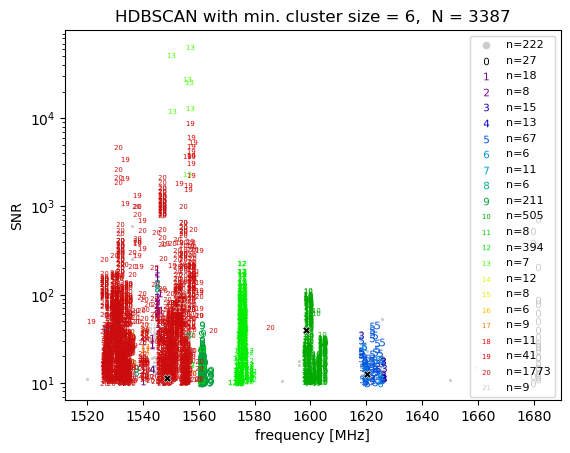

In [83]:
import matplotlib.cm as cm

nmincluster = 6
nminsamples = 2
eps = 0.2

col_idx_x = 0
col_idx_y = 2

hdb = HDBSCAN(min_cluster_size=nmincluster, min_samples=nminsamples, cluster_selection_epsilon=eps, cluster_selection_method='eom')

X = np.transpose(data_arr)
#hdb.fit(X[:,1:])
hdb.fit(X)

print(np.shape(X))

print('Making labels ...')
labels_list = hdb.labels_
labels = np.unique(labels_list)
print(len(labels))

x_param = dfu.columns[col_idx_x]
y_param = dfu.columns[col_idx_y]

x = dfu[x_param].values
y = dfu[y_param].values

colors = cm.nipy_spectral(np.linspace(0, 1, len(labels)-1))

print('Scattering ...')
for l in labels:
    idxs = np.where(labels_list == l)[0]
    if l == -1.:
        plt.scatter(x[idxs], y[idxs], color='0.8', s=5, linewidths=0, label=f'n={len(idxs)}')
    else:
        plt.scatter(x[idxs], y[idxs], marker=f'${l}$', color=colors[l], s=30, linewidths=0, label=f'n={len(idxs)}')

#other_idxs = np.array([683, 691])
other_idxs = np.array([3068, 3069, 3070])
#other_idxs = np.where(labels_list==11)[0]
#other_idxs2 = np.where(labels_list==12)[0]

plt.scatter(x[other_idxs], y[other_idxs], color='k', edgecolors='w', linewidths=0.4, s=30, marker='X')
#plt.scatter(x[other_idxs2], y[other_idxs2], color='w', edgecolors='k', s=30, marker='X')

print('Refining ...')

if 'log10' in df.columns[col_idx_x]:
    plt.xscale('log')
else:
    plt.xscale('linear')
if 'log10' in df.columns[col_idx_y]:
    plt.yscale('log')
else:
    plt.yscale('linear')

plt.xlabel(x_param)
plt.ylabel(y_param)
plt.title(f'HDBSCAN with min. cluster size = {nmincluster},  N = {len(x)}')

leg = plt.legend(fontsize=8)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([30])
#plt.xscale('log')
#plt.yscale('log')

#plt.savefig(f'HDBSCAN_clustering_{col_idx_x}_{col_idx_y}.pdf')

plt.show()

In [82]:
print(labels_list[other_idxs])

[-1 -1 -1]


In [78]:
np.savez(f'/datax/scratch/benjb/hdbscan_labels_M31_setigen_HIP3223_{nmincluster}_{nminsamples}_{eps}.npz', labels_list)

In [18]:
df.values

array([[ 1.00000000e+00,  1.07238557e-02,  2.32623015e-01, ...,
         4.11021938e-01, -1.33642614e+00, -6.24885750e+00],
       [ 9.99991799e-01,  8.04295743e-03,  2.26864836e-01, ...,
         3.79347553e-01, -1.21885574e+00, -6.07148027e+00],
       [ 9.99986450e-01,  1.07238557e-02,  2.42539583e-01, ...,
         2.93311138e-01, -5.50819933e-01, -5.70654154e+00],
       ...,
       [ 9.07485600e-01, -5.36205919e-03,  2.08922660e-01, ...,
         4.65846600e-01, -1.33579528e+00, -6.58011913e+00],
       [ 9.04817829e-01, -2.68089823e-03,  3.54232801e-01, ...,
         5.01578937e-01, -1.50368750e+00, -7.49062061e+00],
       [ 9.03926056e-01,  2.68089823e-03,  2.17220341e-01, ...,
         1.77152784e-01, -3.88933301e-01, -7.35403013e+00]])

In [236]:
### CALCULATE EUCLIDEAN DISTANCE RANKING FOR ANOMALOUS HITS

distance_rankings = []

for idx in np.where(labels_list == -1)[0]:

    params = df.values[idx]    # need to use normalized parameters

    distance_vec = []

    for ii in np.where(labels_list != -1)[0]: # for each non-anomalous point ...
        
        nearby_params = df.values[ii]

        #calculate Euclidean distance between anomalous point and non-anomalous point
        diff_vec = params - nearby_params
        distance = np.sqrt(np.dot(diff_vec, diff_vec))

        distance_vec.append(distance)

    distance_vec = np.array(distance_vec)

    distance_ranking = np.min(distance_vec) # ranking is minimum Euclidean distance to a non-anomalous point
    distance_rankings.append(distance_ranking)

    print(f'For anomalous hit index {idx}, distance ranking is {distance_ranking}.')

distance_rankings = np.array(distance_rankings)
    

For anomalous hit index 23, distance ranking is 0.43087968257157966.
For anomalous hit index 26, distance ranking is 0.6710258398325188.
For anomalous hit index 29, distance ranking is 0.49293960205422416.
For anomalous hit index 30, distance ranking is 0.48008023705279784.
For anomalous hit index 33, distance ranking is 0.33997447888804255.
For anomalous hit index 35, distance ranking is 0.4566422390717845.
For anomalous hit index 37, distance ranking is 0.44015732523301343.
For anomalous hit index 38, distance ranking is 0.7475829999468306.
For anomalous hit index 39, distance ranking is 0.8234525277988559.
For anomalous hit index 43, distance ranking is 0.35331326196053753.
For anomalous hit index 44, distance ranking is 0.7723955130059054.
For anomalous hit index 45, distance ranking is 1.0871117498256828.
For anomalous hit index 48, distance ranking is 0.6267007250021974.
For anomalous hit index 50, distance ranking is 0.49607497427958.
For anomalous hit index 53, distance ranking

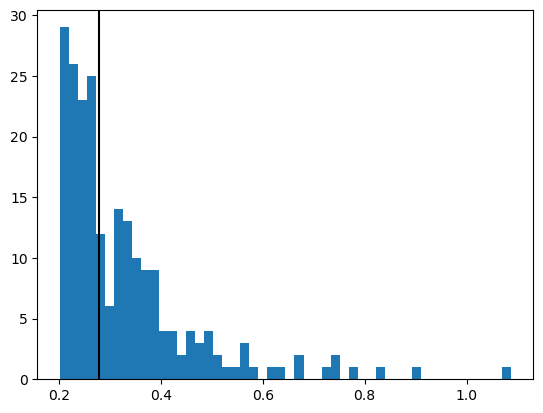

In [188]:
plt.hist(distance_rankings, bins=50)
plt.axvline(np.median(distance_rankings), color='k')
plt.show()

In [237]:
sii = np.argsort(distance_rankings)
sorted_idxs = np.where(labels_list == -1)[0][sii]
print(distance_rankings[sii])
print(sorted_idxs)

[0.20190138 0.20211593 0.20212891 0.20261777 0.20456217 0.20501483
 0.20504226 0.20510602 0.2053517  0.20780801 0.20824247 0.20850122
 0.20914791 0.20975932 0.21027993 0.2103058  0.2112709  0.21239923
 0.21253668 0.21282946 0.21310571 0.21448961 0.21450528 0.2149859
 0.21518139 0.21580397 0.21581093 0.21704396 0.21832439 0.21962488
 0.22063352 0.2208371  0.22182755 0.22212895 0.22217769 0.22256621
 0.22422826 0.22435564 0.22505134 0.22601162 0.22740397 0.22856774
 0.22901893 0.22926951 0.2294896  0.23050327 0.23134939 0.23162192
 0.23185331 0.23197988 0.23221409 0.2336695  0.23413632 0.23593998
 0.23696653 0.23829313 0.23891468 0.24048153 0.2408581  0.24162484
 0.24226531 0.24262939 0.24377195 0.24429489 0.24434954 0.24435152
 0.24527272 0.24613659 0.24719988 0.24762205 0.24912244 0.25027459
 0.25073627 0.25127164 0.25370837 0.25426466 0.25460099 0.25467625
 0.25673739 0.25710437 0.2571095  0.25833573 0.25913388 0.26068678
 0.26162518 0.26177155 0.26379005 0.26406712 0.26415317 0.26488

In [238]:
np.savez(f'/datax/scratch/benjb/sorted_anomalous_idxs_setigen__{nmincluster}_{nminsamples}_{eps}.npz', sorted_idxs)
np.savez(f'/datax/scratch/benjb/sorted_distance_rankings_setigen_{nmincluster}_{nminsamples}_{eps}.npz', distance_rankings[sii])

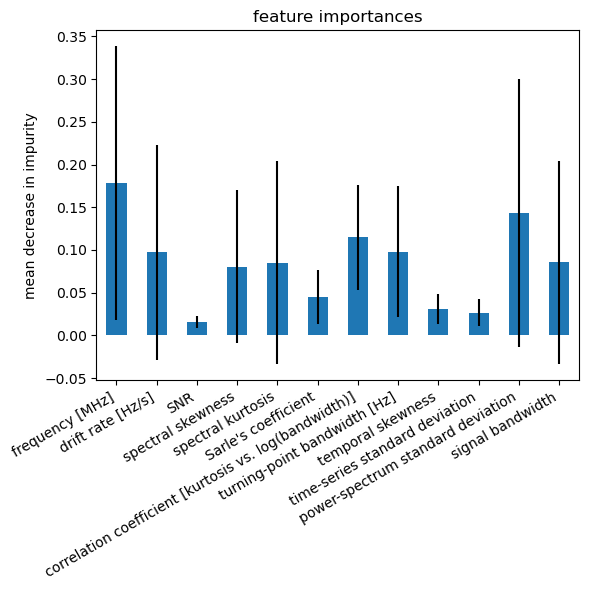

In [73]:
### RANDOM FOREST FOR FEATURE IMPORTANCES

from sklearn.model_selection import train_test_split

y = labels_list

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

from sklearn.ensemble import RandomForestClassifier

#feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names = dfu.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(6,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("feature importances")
ax.set_ylabel("mean decrease in impurity")
plt.xticks(rotation=30, ha="right")
fig.tight_layout()
plt.show()
#plt.savefig('HDBSCAN_feature_importances.pdf')